In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing the keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,InputLayer,Dropout,BatchNormalization
from tensorflow.keras.datasets import fashion_mnist 

In [2]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [3]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

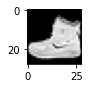

In [4]:
label = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
plt.figure(figsize=(1,1))
plt.imshow(train_images[0], cmap='gray')

In [5]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),name='MP1'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),name='MP2'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()
          

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
MP1 (MaxPooling2D)           (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
MP2 (MaxPooling2D)           (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images=train_images/255.
#normalize the data
cnn_x_train = train_images.reshape(60000,28,28,1)
#reshaping because our model is expecting input in the shape of 28*28*1
test_images=test_images/255.
#normalize the data
cnn_x_test = test_images.reshape(10000,28,28,1)


In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(cnn_x_train,train_labels,epochs=10,batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 53s 70ms/step - loss: 0.4681 - val_loss: 0.3554
Epoch 2/10
750/750 [==============================] - 52s 69ms/step - loss: 0.2832 - val_loss: 0.2840
Epoch 3/10
750/750 [==============================] - 52s 69ms/step - loss: 0.2334 - val_loss: 0.2366
Epoch 4/10
750/750 [==============================] - 53s 70ms/step - loss: 0.1976 - val_loss: 0.2432
Epoch 5/10
750/750 [==============================] - 60s 80ms/step - loss: 0.1722 - val_loss: 0.2296
Epoch 6/10
750/750 [==============================] - 57s 76ms/step - loss: 0.1458 - val_loss: 0.2178
Epoch 7/10
750/750 [==============================] - 58s 77ms/step - loss: 0.1224 - val_loss: 0.2384
Epoch 8/10
750/750 [==============================] - 58s 77ms/step - loss: 0.1003 - val_loss: 0.2420
Epoch 9/10
750/750 [==============================] - 58s 78ms/step - loss: 0.0815 - val_loss: 0.2600
Epoch 10/10
750/750 [==============================] - 58s 77ms/step - loss: 0.070

In [9]:
yhat = model.predict(cnn_x_test)

In [10]:
yhat.shape

(10000, 10)

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(test_labels,np.argmax(yhat,axis=1),target_names=label))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.86      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.87      0.87      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.89      0.86      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.77      0.76      1000
     Sneaker       0.94      0.99      0.96      1000
         Bag       0.95      0.99      0.97      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [12]:
print(confusion_matrix(test_labels,np.argmax(yhat,axis=1)))

[[864   1  16   7   2   2  95   0  13   0]
 [  1 981   0   9   1   0   5   0   3   0]
 [ 18   1 868  11  39   0  55   0   8   0]
 [ 16   0  12 920  16   0  34   0   2   0]
 [  5   0  43  30 863   0  57   0   2   0]
 [  0   0   0   0   0 982   0  15   0   3]
 [ 91   0  54  17  49   0 770   0  19   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  2   0   1   4   0   1   0   4 988   0]
 [  0   0   1   0   0   9   0  41   0 949]]


In [13]:
print(confusion_matrix(test_labels,np.argmax(yhat,axis=1)))

[[864   1  16   7   2   2  95   0  13   0]
 [  1 981   0   9   1   0   5   0   3   0]
 [ 18   1 868  11  39   0  55   0   8   0]
 [ 16   0  12 920  16   0  34   0   2   0]
 [  5   0  43  30 863   0  57   0   2   0]
 [  0   0   0   0   0 982   0  15   0   3]
 [ 91   0  54  17  49   0 770   0  19   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  2   0   1   4   0   1   0   4 988   0]
 [  0   0   1   0   0   9   0  41   0 949]]


In [14]:
#change the data - wherever shirt (label=6) make it T shirt (label=1)
y_train = train_labels.copy()
y_test =test_labels.copy()
y_train[y_train==6]=0#change the data - wherever shirt (label=6)and pullover(label=2)and coat(label=3) make it T shirt (label=1)
y_train = train_labels.copy()
y_test =test_labels.copy()
y_train[y_train==6]=0
y_test[y_test==6]=0
y_train[y_train==2]=0
y_test[y_test==2]=0
y_train[y_train==3]=0
y_test[y_test==3]=0
y_test[y_test==6]=0

In [ ]:
model.fit(cnn_x_train,y_train,epochs=10,batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 58s 77ms/step - loss: 0.0716 - val_loss: 0.1319
Epoch 2/10
750/750 [==============================] - 54s 72ms/step - loss: 0.0359 - val_loss: 0.1431
Epoch 3/10
750/750 [==============================] - 58s 77ms/step - loss: 0.0263 - val_loss: 0.1911
Epoch 4/10
750/750 [==============================] - 61s 81ms/step - loss: 0.0240 - val_loss: 0.1915
Epoch 5/10
750/750 [==============================] - 54s 72ms/step - loss: 0.0236 - val_loss: 0.1770
Epoch 6/10
750/750 [==============================] - 64s 85ms/step - loss: 0.0185 - val_loss: 0.1857
Epoch 7/10
750/750 [==============================] - 74s 99ms/step - loss: 0.0173 - val_loss: 0.1890
Epoch 8/10
750/750 [==============================] - 76s 102ms/step - loss: 0.0197 - val_loss: 0.2113
Epoch 9/10
644/750 [========================>.....] - ETA: 9s - loss: 0.0169

In [ ]:
yhat=model.predict(cnn_x_test)
print(classification_report(y_test,np.argmax(yhat,axis=1),target_names=label1))

In [ ]:
print(confusion_matrix(y_test,np.argmax(yhat,axis=1)))


In [ ]:
#change the data - wherever shirt (label=6)and pullover(label=2)and coat(label=3) make it T shirt (label=1)
y_train = train_labels.copy()
y_test =test_labels.copy()
y_train[y_train==6]=0
y_test[y_test==6]=0
y_train[y_train==2]=0
y_test[y_test==2]=0
y_train[y_train==3]=0
y_test[y_test==3]=0

In [ ]:
model.fit(cnn_x_train,y_train,epochs=10,batch_size=32, validation_split=0.2)

In [ ]:
label1 = ["T-shirt/top","Trouser","Dress","Sandal","Sneaker","Bag","Ankle boot"]

In [ ]:
yhat=model.predict(cnn_x_test)
print(classification_report(y_test,np.argmax(yhat,axis=1),target_names=label1))

In [ ]:
print(confusion_matrix(y_test,np.argmax(yhat,axis=1)))
